In [1]:
import numpy as np
import pandas as pd
import nltk

In [2]:
import string

In [3]:
online_job = pd.read_csv(r'D:\Study\Alabs\Data Science\Projects\project\6. Analyzing online Job Postings\data job posts.csv')

In [295]:
online_job.jobpost[0]

"AMERIA Investment Consulting Company\nJOB TITLE:  Chief Financial Officer\nPOSITION LOCATION: Yerevan, Armenia\nJOB DESCRIPTION:   AMERIA Investment Consulting Company is seeking a\nChief Financial Officer. This position manages the company's fiscal and\nadministrative functions, provides highly responsible and technically\ncomplex staff assistance to the Executive Director. The work performed\nrequires a high level of technical proficiency in financial management\nand investment management, as well as management, supervisory, and\nadministrative skills.\nJOB RESPONSIBILITIES:  \n- Supervises financial management and administrative staff, including\nassigning responsibilities, reviewing employees' work processes and\nproducts, counseling employees, giving performance evaluations, and\nrecommending disciplinary action;\n- Serves as member of management team participating in both strategic\nand operational planning for the company;\n- Directs and oversees the company's financial managem

In [5]:
online_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             19001 non-null object
date                19001 non-null object
Title               18973 non-null object
Company             18994 non-null object
AnnouncementCode    1208 non-null object
Term                7676 non-null object
Eligibility         4930 non-null object
Audience            640 non-null object
StartDate           9675 non-null object
Duration            10798 non-null object
Location            18969 non-null object
JobDescription      15109 non-null object
JobRequirment       16479 non-null object
RequiredQual        18517 non-null object
Salary              9622 non-null object
ApplicationP        18941 non-null object
OpeningDate         18295 non-null object
Deadline            18936 non-null object
Notes               2211 non-null object
AboutC              12470 non-null object
Attach              1559 non-null object
Year              

In [6]:
online_job.JobDescription

0        AMERIA Investment Consulting Company is seekin...
1                                                      NaN
2        Public outreach and strengthening of a growing...
3        The LEAD (Local Enhancement and Development fo...
4                                                      NaN
5           Saleswoman will sell menswear and accessories.
6        The Armenian Branch Office of the Open Society...
7                                                      NaN
8                                                      NaN
9        The incumbent assists in coordinating INL-fund...
10                                                     NaN
11                                                     NaN
12       ISC seeks an experienced and creative Chief of...
13       Food Security Regional Cooperation and Stabili...
14                                                     NaN
15                                                     NaN
16                                                     N

In [7]:
online_job.jobpost[0]

"AMERIA Investment Consulting Company\nJOB TITLE:  Chief Financial Officer\nPOSITION LOCATION: Yerevan, Armenia\nJOB DESCRIPTION:   AMERIA Investment Consulting Company is seeking a\nChief Financial Officer. This position manages the company's fiscal and\nadministrative functions, provides highly responsible and technically\ncomplex staff assistance to the Executive Director. The work performed\nrequires a high level of technical proficiency in financial management\nand investment management, as well as management, supervisory, and\nadministrative skills.\nJOB RESPONSIBILITIES:  \n- Supervises financial management and administrative staff, including\nassigning responsibilities, reviewing employees' work processes and\nproducts, counseling employees, giving performance evaluations, and\nrecommending disciplinary action;\n- Serves as member of management team participating in both strategic\nand operational planning for the company;\n- Directs and oversees the company's financial managem

In [8]:
online_job.groupby('Year').jobpost.count().plot(kind='line',marker='o')

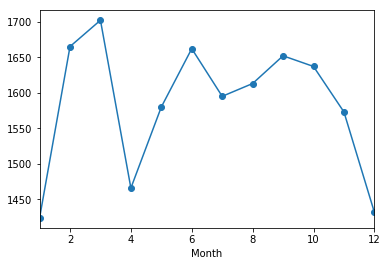

In [9]:
online_job.groupby('Month').jobpost.count().plot(kind='line',marker='o')

In [10]:
import seaborn as sns
print(dir(sns))

['FacetGrid', 'JointGrid', 'PairGrid', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_orig_rc_params', 'algorithms', 'axes_style', 'axisgrid', 'barplot', 'blend_palette', 'boxenplot', 'boxplot', 'categorical', 'catplot', 'choose_colorbrewer_palette', 'choose_cubehelix_palette', 'choose_dark_palette', 'choose_diverging_palette', 'choose_light_palette', 'clustermap', 'cm', 'color_palette', 'colors', 'countplot', 'crayon_palette', 'crayons', 'cubehelix_palette', 'dark_palette', 'desaturate', 'despine', 'distplot', 'distributions', 'diverging_palette', 'dogplot', 'external', 'factorplot', 'get_dataset_names', 'heatmap', 'hls_palette', 'husl_palette', 'jointplot', 'kdeplot', 'light_palette', 'lineplot', 'lmplot', 'load_dataset', 'lvplot', 'matrix', 'miscplot', 'mpl', 'mpl_palette', 'pairplot', 'palettes', 'palplot', 'plotting_context', 'pointplot', 'rcmod', 'regplot', 'regression', 'relational', 'relplot

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
com = online_job.Company.dropna().apply(lambda x : "".join([c for c in x if c not in string.punctuation]))
com = com.apply(lambda x : x.lower())

In [13]:
pd.DataFrame(com).groupby('Company').Company.count().sort_values(ascending = False).head(20)

Company
armentel cjsc                                356
ameriabank cjsc                              252
world vision armenia                         239
mentor graphics development services cjsc    236
career center ngo                            229
orange armenia                               203
sas group llc                                173
converse bank cjsc                           162
vtb bank armenia cjsc                        162
inecobank cjsc                               152
undp armenia office                          132
haypost cjsc                                 126
energize global services cjsc                126
central bank of armenia                      126
osce office in yerevan                       125
hsbc bank armenia cjsc                       121
synopsys armenia                             112
aregak universal credit organization cjsc    112
ardshininvestbank cjsc                       109
ktelecom cjsc vivacellmts                    106
Name: Compan

In [14]:
df = online_job[["jobpost","Title","JobDescription","JobRequirment","RequiredQual","AboutC","Year","IT"]]

In [15]:
df = df[~df.duplicated(subset=['jobpost','Title'],keep='first')]

In [16]:
df = df.dropna(axis=1)

In [17]:
df['jobpost'] = df.jobpost.apply(lambda x : x.replace('\n'," ").replace("'",""))

In [18]:
import re

In [20]:

def num(word):
    abc = []
    word = word.split(" ")
    for i in word:
        if re.match(r'^\S+@\S+|[0-9]|www\S+|\S+[0-9]|\S+.am', i) != None:
             abc.append(i)
    a = ' '.join([x for x in word if x not in abc])
    a = ''.join([y for y in a if y not in string.punctuation])
    return a

df.jobpost = df.jobpost.apply(lambda x: num(x))
                

In [21]:
df.jobpost = df.jobpost.apply(lambda x : x.lower())

In [22]:
import nltk
#from nltk.tokenize import TreebankWordTokenizer
#tokenizer = TreebankWordTokenizer()
df.jobpost = df.jobpost.apply(lambda x : nltk.word_tokenize(x))

In [23]:
from nltk.corpus import stopwords
df.jobpost = df.jobpost.apply(lambda x :[y for y in x if y not in set(stopwords.words('english'))])

In [24]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [25]:
def get_pos( word ):
    w_synsets = wordnet.synsets(word)

    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in w_synsets if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in w_synsets if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in w_synsets if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in w_synsets if item.pos()=="r"]  )
    
    most_common_pos_list = pos_counts.most_common(3)
    return most_common_pos_list[0][0]

In [26]:
wnl = WordNetLemmatizer()
df.jobpost = df.jobpost.apply(lambda x: [wnl.lemmatize(word, get_pos(word)) for word in x])


In [27]:
abc = ['armenian','armenia','salary','job','title','position','location','responsibilities','application','procedures','deadline','required','qualifications','renumeration','date','company','llc']
df.jobpost = df.jobpost.apply(lambda x : [y for y in x if y not in abc] )

In [28]:
df.jobpost

0        [ameria, investment, consult, chief, financial...
1        [international, research, exchange, board, ire...
2        [caucasus, environmental, ngo, network, cenn, ...
3        [manoff, group, bcc, specialist, manila, phili...
4        [yerevan, brandy, software, developer, yerevan...
5        [boutique, appollo, saleswoman, yerevan, work,...
6        [osi, assistance, foundation, branch, office, ...
7        [international, research, exchange, board, ire...
8        [yerevan, brandy, assistant, manage, director,...
9        [american, embassy, yerevan, announcement, num...
10       [international, research, exchange, board, ire...
11       [international, research, exchange, board, ire...
12       [institute, sustainable, community, isc, chief...
13       [food, security, regional, cooperation, stabil...
14       [teleplus, general, manager, yerevan, responsi...
15       [netcall, communication, network, administrato...
16       [socstockholm, utopian, world, description, ca.

In [29]:
bgm_jobpost = df.jobpost.apply(lambda x :list(nltk.bigrams(x)))

In [30]:
bgm_jobpost.head()

0    [(ameria, investment), (investment, consult), ...
1    [(international, research), (research, exchang...
2    [(caucasus, environmental), (environmental, ng...
3    [(manoff, group), (group, bcc), (bcc, speciali...
4    [(yerevan, brandy), (brandy, software), (softw...
Name: jobpost, dtype: object

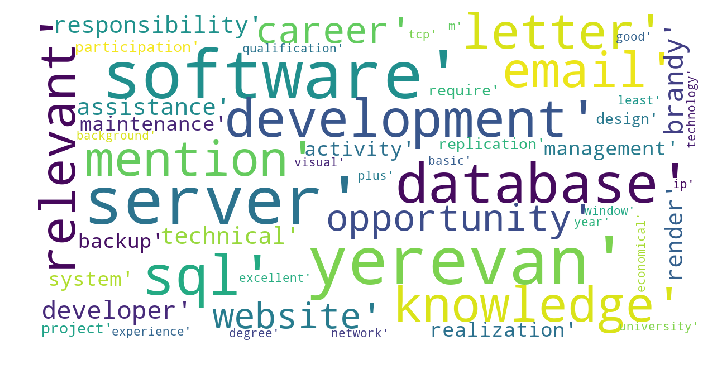

In [31]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=50,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.jobpost[4])


In [32]:
wordfreq = {}
for x in df.jobpost[0]:
    if x not in wordfreq.keys():
        wordfreq[x] = 1
    else:
        wordfreq[x] += 1

In [33]:
pd.DataFrame(pd.Series(wordfreq)).reset_index()

,index,0
0,ameria,2
1,investment,8
2,consult,3
3,chief,2
4,financial,17
5,officer,2
6,yerevan,1
7,description,1
8,seek,1
9,manage,4


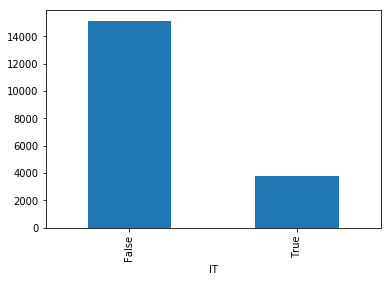

In [270]:
df.groupby('IT').IT.count().plot('bar')

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
df.jobpost = df.jobpost.apply(lambda x: ' '.join([y for y in x]))

In [37]:
df.jobpost

0        ameria investment consult chief financial offi...
1        international research exchange board irex ful...
2        caucasus environmental ngo network cenn countr...
3        manoff group bcc specialist manila philippine ...
4        yerevan brandy software developer yerevan resp...
5        boutique appollo saleswoman yerevan work hour ...
6        osi assistance foundation branch office chief ...
7        international research exchange board irex non...
8        yerevan brandy assistant manage director yerev...
9        american embassy yerevan announcement number a...
10       international research exchange board irex sho...
11       international research exchange board irex non...
12       institute sustainable community isc chief part...
13       food security regional cooperation stability f...
14       teleplus general manager yerevan responsibilit...
15       netcall communication network administrator ye...
16       socstockholm utopian world description call pa.

In [221]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
def bow_extractor(corpus):
    vectorizer = CountVectorizer()
    features   = vectorizer.fit_transform(corpus)
    return  vectorizer ,features 

NameError: name 'self' is not defined

In [212]:
bow_vectorizer , bow_features = bow_extractor(df.jobpost)
#features = bow_features
print(bow_features)

  (0, 7644)	1
  (0, 17066)	1
  (0, 18304)	1
  (0, 9438)	1
  (0, 18018)	1
  (0, 12706)	1
  (0, 23668)	1
  (0, 25741)	2
  (0, 24904)	1
  (0, 3826)	1
  (0, 3571)	2
  (0, 16977)	2
  (0, 13533)	1
  (0, 14838)	2
  (0, 4219)	1
  (0, 12296)	1
  (0, 16411)	1
  (0, 3486)	1
  (0, 21651)	1
  (0, 23487)	1
  (0, 8755)	1
  (0, 2017)	1
  (0, 10953)	1
  (0, 23339)	1
  (0, 22735)	1
  :	:
  (18891, 5092)	1
  (18891, 2988)	3
  (18891, 20062)	1
  (18891, 18580)	1
  (18891, 6466)	2
  (18891, 23190)	1
  (18891, 6920)	1
  (18891, 19036)	2
  (18891, 6488)	1
  (18891, 12186)	5
  (18891, 18028)	1
  (18891, 20248)	2
  (18891, 21856)	2
  (18891, 25785)	1
  (18891, 10718)	3
  (18891, 20128)	1
  (18891, 26032)	6
  (18891, 22460)	1
  (18891, 20251)	1
  (18891, 19096)	5
  (18891, 9593)	3
  (18891, 450)	1
  (18891, 6351)	1
  (18891, 26319)	2
  (18891, 8957)	1


In [213]:
feature_names =  bow_vectorizer.get_feature_names()

In [208]:
len(feature_names)

26487

In [42]:
def display_features(features,features_names):
    data = pd.DataFrame(data=features,columns=feature_names)
    return(data)

In [152]:
display_features(features,feature_names)

,10,100,15,25,35,37441,50,8189901416,aa,aaa,...,zorian,zte,ztes,zugdidi,zurabian,zvardnots,zvartnots,zwilling,zx,zyhel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
def tfidf_extractor(corpus):
    vectorizer = TfidfVectorizer(min_df = 1, use_idf = True,norm = 'l2')
    features   = vectorizer.fit_transform(corpus)
    return vectorizer , features


In [154]:
tfidf_vectorizer ,tfidf_features =  tfidf_extractor(df.jobpost)


In [46]:
#data1 = display_features(np.round(tfidf_features.todense(),2),feature_names)

In [47]:
#data1.shape

(18892, 26487)

In [155]:
from sklearn.decomposition import TruncatedSVD 

In [156]:
tfidf_features.shape

(18892, 26487)

# SVD

In [157]:
svd = TruncatedSVD(n_components = 1500)

In [158]:
tfidf_reduced = svd.fit_transform(tfidf_features)

In [159]:
tfidf_reduced.shape

(18892, 1500)

In [160]:
best_features = [feature_names[i] for i in svd.components_[0].argsort()[::-1]]


In [161]:
len(best_features[:1500])

1500

In [162]:
print(dir(svd))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_get_param_names', 'algorithm', 'components_', 'explained_variance_', 'explained_variance_ratio_', 'fit', 'fit_transform', 'get_params', 'inverse_transform', 'n_components', 'n_iter', 'random_state', 'set_params', 'singular_values_', 'tol', 'transform']


In [163]:
svd.components_.T.shape

(26487, 1500)

In [164]:
best_features[:10]

['knowledge',
 'work',
 'mention',
 'experience',
 'please',
 'website',
 'skill',
 'opportunity',
 'post',
 'development']

In [58]:
reduced_df = pd.DataFrame(tfidf_reduced, columns = best_features[:1500])

In [59]:
reduced_df

,knowledge,work,mention,experience,please,website,skill,opportunity,post,development,...,tune,ready,liability,autocad,common,ticket,suggest,adviser,storage,superior
0,0.377586,-0.233869,0.252120,0.174335,-0.020658,0.205397,-0.078166,-0.085511,0.044028,0.064567,...,0.012414,-0.000361,0.009902,-0.005615,-0.001240,0.015636,-0.009386,0.012644,-0.000692,-0.023331
1,0.195771,-0.035445,-0.030315,0.094927,-0.057472,-0.086608,0.046628,0.035801,-0.021851,-0.028119,...,0.002145,-0.013020,0.000169,-0.019608,-0.000485,-0.009544,-0.012022,0.001532,-0.006793,0.016577
2,0.157226,-0.028013,-0.025181,0.123501,-0.021644,-0.055273,0.011391,0.021939,-0.006258,0.012856,...,0.006839,0.008504,0.003926,-0.004951,0.004447,-0.000764,0.024940,0.012817,0.006151,0.030491
3,0.194377,0.019983,-0.027371,0.167098,0.047418,-0.004581,0.006015,-0.022559,0.055301,-0.019415,...,0.011805,-0.023025,-0.005676,0.005372,-0.004008,0.015681,-0.001311,0.014836,0.003267,0.009699
4,0.276516,0.157652,0.058497,-0.008419,-0.031952,-0.082368,-0.074826,-0.079799,0.018858,0.124313,...,0.021796,-0.006869,0.020814,-0.004485,-0.013237,-0.008332,0.001802,-0.012525,0.008788,-0.004887
5,0.140379,-0.007868,-0.024392,-0.046953,-0.054475,-0.050441,0.021696,0.030914,-0.020077,0.008956,...,-0.009508,0.015465,0.001258,-0.008507,-0.027821,0.008206,-0.012544,-0.005712,-0.005498,-0.010228
6,0.240373,-0.121983,0.147414,-0.003379,-0.146892,0.026543,-0.008656,0.035784,-0.004110,-0.046345,...,-0.010031,0.000890,-0.003553,0.004383,-0.013377,-0.002688,-0.006481,-0.013754,0.001614,-0.003666
7,0.177081,-0.032767,-0.032831,0.109486,-0.042703,-0.087692,0.074944,0.032960,-0.024024,-0.044287,...,-0.008379,-0.000272,0.002758,-0.011887,-0.008646,0.006308,0.005016,0.007924,-0.010120,0.009351
8,0.273987,-0.053711,-0.036511,0.014488,-0.095144,-0.084754,0.051143,0.047989,-0.013887,0.043101,...,-0.005508,-0.009576,0.022722,0.010776,-0.023784,-0.012885,0.011258,-0.000394,-0.004345,-0.009320
9,0.179589,-0.057818,-0.008813,0.091172,-0.022218,-0.077997,0.032151,-0.003304,0.016498,-0.029097,...,-0.007905,-0.003202,0.007533,0.010982,-0.003394,0.015738,-0.006541,-0.012570,0.001328,0.008898


In [60]:
y = df['IT']

In [61]:
reduced_df.shape

(18892, 1500)

In [62]:
tfidf_reduced.shape

(18892, 1500)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [64]:
X_train,X_test,Y_train,Y_test = train_test_split(reduced_df,y,random_state=123,test_size=0.3)

In [65]:
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [66]:
y_pred = clf.predict(X_test)

In [67]:
from sklearn import metrics
print(metrics.accuracy_score(Y_test, y_pred))

0.9424841213832039


In [68]:
print(metrics.confusion_matrix(Y_test, y_pred))

[[4426   79]
 [ 247  916]]


In [69]:
print(metrics.roc_auc_score(Y_test, y_pred))

0.8850410788433222


# Clustering

In [70]:
online_job.RequiredQual.dropna(inplace=True)


In [71]:
req_qual = online_job.RequiredQual

In [72]:
req_qual

0        To perform this job successfully, an\nindividu...
1        - Bachelor's Degree; Master's is preferred;\n-...
2        - Degree in environmentally related field, or ...
3        - Advanced degree in public health, social sci...
4        - University degree; economical background is ...
5        - Candidates should be female, 20-30 years old...
6        - University degree in finance/ accounting; \n...
8        - University degree;\n- At least 3 years of ex...
9        NOTE: All applicants are instructed to\naddres...
12       - Masters degree with minimum of seven years o...
13       - Higher Education and/or professional experie...
14       - Degree in Business Administration or Technol...
15       - Excellent knowledge of Windows 2000 Server, ...
17       - Minimum Masters Degree in Economics;\n- Mini...
18       - Possession of personal vehicle, valid driver...
19       As a GD you are creative, innovative and have\...
20       - Fluency in spoken and written English; knowl.

In [73]:
req_qual[0]

"To perform this job successfully, an\nindividual must be able to perform each essential duty satisfactorily.\nThe requirements listed below are representative of the knowledge,\nskill, and/or ability required.\nKnowledge of:\n- Generally accepted accounting principles;\n- Local accounting standards and legislation;\n- State reporting requirements pertaining to accounting;\n- Principles and practices of financial management and budgeting;\n- Principles and practices of financial systems design and analysis;\n- Principles and practices of contract management, records management,\nand risk management;\n- Principles and practices of management and supervision;\n- Principles and practices of information systems management.\nAbility to:\n- Apply sound fiscal and administrative practices to the company's\nactivities;\n- Plan, organize and supervise the work of subordinate employees,\nincluding training them, assigning and evaluating their work, and\nproviding job performance feedback;\n- Cri

In [74]:
req_qual = req_qual[~req_qual.duplicated()]

In [75]:
#req_qual = pd.DataFrame(req_qual)

In [76]:
a = pd.DataFrame(req_qual)


In [77]:
req_qual = req_qual.apply(lambda x : ''.join([c.lower() for c in x if c not in string.punctuation]))


In [78]:
req_qual

0        to perform this job successfully an\nindividua...
1         bachelors degree masters is preferred\n excel...
2         degree in environmentally related field or 5 ...
3         advanced degree in public health social scien...
4         university degree economical background is a ...
5         candidates should be female 2030 years old\n ...
6         university degree in finance accounting \n on...
8         university degree\n at least 3 years of exper...
9        note all applicants are instructed to\naddress...
12        masters degree with minimum of seven years of...
13        higher education andor professional experienc...
14        degree in business administration or technolo...
15        excellent knowledge of windows 2000 server li...
17        minimum masters degree in economics\n minimum...
18        possession of personal vehicle valid drivers ...
19       as a gd you are creative innovative and have\n...
20        fluency in spoken and written english knowled.

In [79]:
req_qual = req_qual.apply(lambda x : x.replace('\n'," ").replace("'",""))

In [80]:
req_qual

0        to perform this job successfully an individual...
1         bachelors degree masters is preferred  excell...
2         degree in environmentally related field or 5 ...
3         advanced degree in public health social scien...
4         university degree economical background is a ...
5         candidates should be female 2030 years old  n...
6         university degree in finance accounting   one...
8         university degree  at least 3 years of experi...
9        note all applicants are instructed to address ...
12        masters degree with minimum of seven years of...
13        higher education andor professional experienc...
14        degree in business administration or technolo...
15        excellent knowledge of windows 2000 server li...
17        minimum masters degree in economics  minimum ...
18        possession of personal vehicle valid drivers ...
19       as a gd you are creative innovative and have a...
20        fluency in spoken and written english knowled.

In [81]:
req_qual = req_qual.apply(lambda x : x.replace('  ',' ') )

In [82]:
req_qual = req_qual.apply(lambda x : x.strip())

In [83]:
req_qual = req_qual.apply(lambda x : re.sub('\d+ ',' ',x))

In [84]:
req_qual = req_qual.apply(lambda x : nltk.word_tokenize(x))

In [85]:
req_qual = req_qual.apply(lambda x : [c for c in x if c not in set(stopwords.words('english'))])

In [86]:
wnl = WordNetLemmatizer()
req_qual = req_qual.apply(lambda x: [wnl.lemmatize(word, get_pos(word)) for word in x])


In [87]:
req_qual = req_qual.apply(lambda x: ' '.join([y for y in x]))

In [88]:
bow_vectorizer1 , bow_features1 = bow_extractor(req_qual)
features1 = bow_features1.todense()
print(features1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [89]:
feature_names1 =  bow_vectorizer1.get_feature_names()

In [90]:
feature_names1

['013u',
 '018u',
 '06',
 '10',
 '10g',
 '10x',
 '115',
 '11g',
 '11x',
 '12x',
 '15',
 '19x',
 '1c',
 '1cquickbooks',
 '1st',
 '1x',
 '1xx9xx',
 '1year',
 '2000200520082008r',
 '2000windows',
 '2000xp',
 '2000xpvista',
 '2003sf',
 '2004',
 '2005oracle',
 '2008',
 '2008r',
 '200x',
 '200xxp',
 '2014',
 '20xx',
 '2121',
 '24hour',
 '24hourproject',
 '24hours',
 '24hr',
 '24v',
 '24x',
 '25',
 '2540',
 '26th',
 '2d',
 '2d3d',
 '2g',
 '2g3g',
 '2g3g3g',
 '2k',
 '2nd',
 '2to',
 '2x',
 '2year',
 '2years',
 '30s40s',
 '32bit',
 '34in',
 '34th',
 '35',
 '3com',
 '3d',
 '3des',
 '3dmax',
 '3dstudio',
 '3g',
 '3month',
 '3par',
 '3rd',
 '3sql',
 '3th',
 '3tier',
 '3x',
 '3year',
 '3years',
 '40',
 '4028nm',
 '40lsoft',
 '40or',
 '40x41x',
 '480v',
 '4sql',
 '4th',
 '4x',
 '4year',
 '50',
 '52x',
 '53x',
 '53xx',
 '54xx',
 '5aware',
 '5person',
 '5th',
 '5x',
 '5x6x',
 '5year',
 '5years',
 '6month',
 '6th',
 '6x',
 '6year',
 '77',
 '7x',
 '8021d',
 '82',
 '868mhz',
 '8i',
 '8i10g',
 '8i9i',
 '8i

In [91]:
display_features(features1,feature_names1)

,013u,018u,06,10,10g,10x,115,11g,11x,12x,...,zepto,zerobased,zf,zigbee,zminimum,zone,zookeeper,zoology,zte,zyhel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
tfidf_vectorizer1 ,tfidf_features1 =  tfidf_extractor(req_qual)
display_features(np.round(tfidf_features1.todense(),2),feature_names1)

,013u,018u,06,10,10g,10x,115,11g,11x,12x,...,zepto,zerobased,zf,zigbee,zminimum,zone,zookeeper,zoology,zte,zyhel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
svd1 = TruncatedSVD(n_components = 1500)

In [147]:
tfidf_reduced1 = svd1.fit_transform(tfidf_features1.todense())

In [95]:
tfidf_reduced1.shape

(16688, 1500)

In [96]:
best_features1 = [feature_names1[i] for i in svd1.components_[0].argsort()[::-1]]


In [97]:
best_features1[:1500]

['knowledge',
 'skill',
 'work',
 'experience',
 'ability',
 'excellent',
 'language',
 'good',
 'armenian',
 'english',
 'russian',
 'year',
 'high',
 'communication',
 'field',
 'degree',
 'strong',
 'least',
 'computer',
 'plus',
 'education',
 'relevant',
 'university',
 'accounting',
 'office',
 'write',
 'team',
 'management',
 'bank',
 'relate',
 'pressure',
 'finance',
 'software',
 'fluency',
 'economics',
 'development',
 'analytical',
 'excel',
 'business',
 'market',
 'personality',
 'organizational',
 'interpersonal',
 'word',
 'professional',
 'technical',
 'responsibility',
 'advance',
 'project',
 'preferably',
 'international',
 'system',
 'sense',
 'financial',
 'internet',
 'prefer',
 'literacy',
 'legislation',
 'oral',
 'preferable',
 'understand',
 'science',
 'application',
 'sale',
 'microsoft',
 'design',
 'desirable',
 'law',
 'basic',
 'time',
 'minimum',
 'administration',
 'presentation',
 'environment',
 'deadline',
 'negotiation',
 'verbal',
 'level',
 't

In [127]:
req_data = pd.DataFrame(tfidf_reduced1, columns = best_features1[:1500])

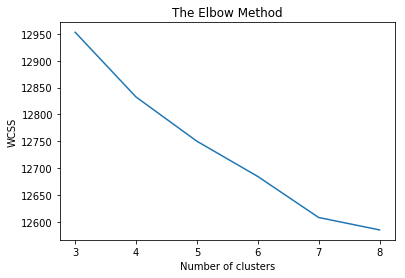

In [98]:
from sklearn.cluster import KMeans
wcss = []
for i in range(3, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(tfidf_reduced1)
    wcss.append(kmeans.inertia_)
plt.plot(range(3, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [99]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
ykmeans = kmeans.fit_predict(tfidf_reduced1)


In [100]:
ykmeans

array([6, 0, 3, ..., 0, 0, 4])

In [101]:
a['clusters'] = ykmeans

In [102]:
a

,RequiredQual,clusters
0,"To perform this job successfully, an\nindividu...",6
1,- Bachelor's Degree; Master's is preferred;\n-...,0
2,"- Degree in environmentally related field, or ...",3
3,"- Advanced degree in public health, social sci...",0
4,- University degree; economical background is ...,5
5,"- Candidates should be female, 20-30 years old...",3
6,- University degree in finance/ accounting; \n...,6
8,- University degree;\n- At least 3 years of ex...,4
9,NOTE: All applicants are instructed to\naddres...,3
12,- Masters degree with minimum of seven years o...,0


In [103]:
online_job_new = online_job.merge(a,how = 'inner', on = 'RequiredQual')

In [104]:
online_job_new

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT,clusters
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False,6
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False,0
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False,3
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False,0
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True,5
5,"Boutique ""Appollo""\nJOB TITLE: Saleswoman\nPO...","Jan 10, 2004",Saleswoman,"Boutique ""Appollo""",NaN,NaN,NaN,NaN,NaN,NaN,...,"For further information, please contact Irina\...",NaN,01 February 2004,NaN,NaN,NaN,2004,1,False,3
6,OSI Assistance Foundation - Armenian Branch Of...,"Jan 11, 2004",Chief Accountant/ Finance Assistant,OSI Assistance Foundation - Armenian Branch Of...,NaN,NaN,NaN,NaN,NaN,NaN,...,"For submission of applications/ CVs, please\nc...",NaN,"16 January 2004, 6:00 pm.",NaN,NaN,NaN,2004,1,False,6
7,International Research & Exchanges Board (IREX...,"Jan 13, 2004",Non-paid part or full time Programmatic Intern,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,6 months,...,"To apply, please download and submit the\nappl...",NaN,16 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False,4
8,Yerevan Brandy Company \nJOB TITLE: Assistant...,"Jan 13, 2004",Assistant to Managing Director,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,Successful candidates should submit\n- CV; \n-...,NaN,"27 January 2004, 18:00",NaN,NaN,NaN,2004,1,False,3
9,American Embassy Yerevan\nANNOUNCEMENT NUMBER:...,"Jan 13, 2004","Program Assistant (INL), FSN-8; FP-6*",American Embassy Yerevan\nANNOUNCEMENT NUMBER:...,NaN,NaN,NaN,NaN,NaN,NaN,...,Interested candidates for this position should...,NaN,26 January 2004 \nDrafted: GSargsyan\nClear...,NaN,NaN,NaN,2004,1,False,0


In [105]:
online_job_new['bins_Year']=pd.cut(online_job_new.Year,bins = [2003,2007,2011,2015] )

In [106]:
#online_job_new[['bins_Year','clusters']].plot(kind = 'bar')

In [107]:
online_job_new.bins_Year.dtypes

CategoricalDtype(categories=[(2003, 2007], (2007, 2011], (2011, 2015]],
              ordered=True)

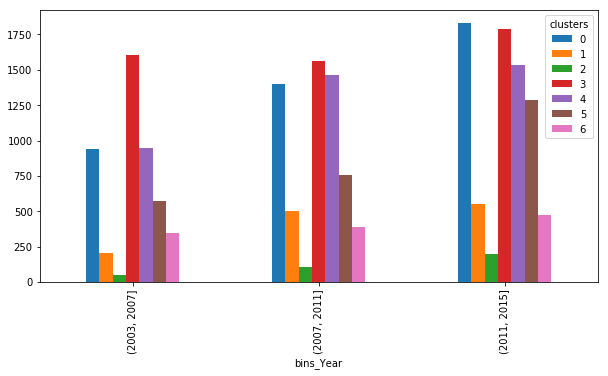

In [108]:
online_job_new.groupby(['clusters','bins_Year'])['clusters'].count().unstack(0).plot(kind = 'bar', figsize=(10,5))

In [109]:
from sklearn.decomposition import LatentDirichletAllocation

In [188]:
!pip install pyLDAvis
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

  Stored in directory: C:\Users\vishe\AppData\Local\pip\Cache\wheels\98\71\24\513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Stored in directory: C:\Users\vishe\AppData\Local\pip\Cache\wheels\20\5a\d8\1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


C:\Users\vishe\Anaconda3\lib\site-packages\past\types\oldstr.py:33: DeprecationWarning: invalid escape sequence \d
  """


In [186]:
total_topics = 7 
lda = LatentDirichletAllocation(n_topics=total_topics,max_iter=100,learning_method='online',learning_offset=50,random_state=42)

In [228]:
lda.fit(bow_features)

C:\Users\vishe\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


KeyboardInterrupt: 

In [215]:
weights = lda.components_

In [216]:
def get_topics_terms_weights(weights, feature_names):
    feature_names = np.array(feature_names)
    sorted_indices = np.array([list(row[::-1]) for row in np.argsort(np.abs(weights))])
    sorted_weights = np.array([list(wt[index]) for wt, index  in zip(weights, sorted_indices)])
    sorted_terms = np.array([list(feature_names[row]) for row in sorted_indices])
    
    topics = [np.vstack((terms.T, term_weights.T)).T for terms, term_weights in zip (sorted_terms, sorted_weights)]
    return topics

In [217]:
def print_topics_udf(topics, total_topics= 1, weight_threshold = 0.0001, display_weights = False, num_terms = None):
    for index in range(total_topics):
        topic = topics[index]
        topic = [(term, float(wt)) for term, wt in topic]
        topic = [(word, round(wt,2)) for word, wt in topic if abs(wt) >= weight_threshold]
        
        if display_weights:
            print('Topic #'+ str(index + 1)+ ' with weights')
            print(topic[:num_terms] if num_terms else topic)
        else:
            print('Topic #'+ str(index + 1)+ ' without weights')
            tw = [term for term, wt in topic]
            print(tw[:num_terms] if num_terms else tw)

In [218]:
topics = get_topics_terms_weights(weights, feature_names)

In [219]:
print_topics_udf(topics = topics, total_topics = total_topics, num_terms = 11, display_weights = True)

Topic #1 with weights
[('experience', 16200.1), ('knowledge', 14366.92), ('software', 12614.09), ('development', 11355.21), ('work', 10898.91), ('please', 10711.97), ('mention', 10517.08), ('website', 10320.51), ('design', 10201.56), ('opportunity', 9728.29), ('post', 9386.86)]
Topic #2 with weights
[('mention', 25521.12), ('please', 23215.78), ('website', 22585.03), ('opportunity', 22550.61), ('post', 21577.1), ('skill', 19759.89), ('work', 17693.49), ('knowledge', 17072.18), ('candidate', 15537.78), ('letter', 13375.32), ('experience', 13297.72)]
Topic #3 with weights
[('project', 19385.65), ('development', 11335.37), ('work', 10065.92), ('experience', 7885.94), ('management', 7882.19), ('support', 7037.05), ('organization', 6527.66), ('activity', 6399.82), ('skill', 6253.38), ('ensure', 5879.87), ('plan', 5856.5)]
Topic #4 with weights
[('english', 3610.26), ('center', 3578.34), ('language', 3478.42), ('website', 3155.32), ('opportunity', 3008.78), ('please', 2940.3), ('career', 262

In [237]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, bow_features,bow_vectorizer, mds='tsne')
panel

C:\Users\vishe\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1       16.945707  -81.004898       1        1  38.261050
2       69.409180  -53.473923       2        1  21.766150
0       71.798943    5.726070       3        1  21.695882
5       67.019188 -112.674545       4        1   7.537421
3       19.335207  -21.804756       5        1   7.172183
6      119.482666  -85.144287       6        1   1.820535
4      121.872383  -25.943848       7        1   1.746779, topic_info=      Category          Freq            Term         Total  loglift  logprob
14421  Default  13165.000000          market  13165.000000  30.0000  30.0000
2552   Default  12206.000000            bank  12206.000000  29.0000  29.0000
21442  Default  15404.000000         service  15404.000000  28.0000  28.0000
8957   Default  11079.000000       financial  11079.000000  27.0000  27.0000
18940  Default  24474.000000         project  24474.000000  26.0000  26.0000
20062  Default  15952.000000          report  15952.000000  25.0000  25.0000
16904  Default   6758.000000            open   6758.000000  24.0000  24.0000
204    Default   7923.000000      accounting   7923.000000  23.0000  23.0000
22073  Default  14812.000000        software  14812.000000  22.0000  22.0000
1463   Default  10312.000000           apply  10312.000000  21.0000  21.0000
18085  Default  40991.000000          please  40991.000000  20.0000  20.0000
3826   Default  22859.000000          center  22859.000000  19.0000  19.0000
14724  Default   3263.000000         medical   3263.000000  18.0000  18.0000
6488   Default  25191.000000     development  25191.000000  17.0000  17.0000
8938   Default   5864.000000         finance   5864.000000  16.0000  16.0000
13363  Default  24489.000000        language  24489.000000  15.0000  15.0000
7852   Default  22003.000000         english  22003.000000  14.0000  14.0000
13570  Default   4507.000000           legal   4507.000000  13.0000  13.0000
3571   Default  20837.000000          career  20837.000000  12.0000  12.0000
6373   Default  12394.000000          design  12394.000000  11.0000  11.0000
5503   Default   4815.000000          credit   4815.000000  10.0000  10.0000
14264  Default  17387.000000      management  17387.000000   9.0000   9.0000
26032  Default  42267.000000            work  42267.000000   8.0000   8.0000
23618  Default   8409.000000            test   8409.000000   7.0000   7.0000
23190  Default  13690.000000          system  13690.000000   6.0000   6.0000
22525  Default  10907.000000           start  10907.000000   5.0000   5.0000
8454   Default  40403.000000      experience  40403.000000   4.0000   4.0000
12059  Default   2764.000000       insurance   2764.000000   3.0000   3.0000
20298  Default   5411.000000          resume   5411.000000   2.0000   2.0000
25741  Default  41051.000000         website  41051.000000   1.0000   1.0000
...        ...           ...             ...           ...      ...      ...
10062   Topic7     80.955942          golden     81.826139   4.0367  -6.7498
3367    Topic7     79.272932          byblos     80.137925   4.0365  -6.7708
15060   Topic7     76.031595         migrant     76.899300   4.0360  -6.8125
10329   Topic7    672.273101           guest    699.416614   4.0078  -4.6330
6907    Topic7    522.110260          doctor    548.453304   3.9982  -4.8858
25171   Topic7    794.410630         vehicle    901.788328   3.9206  -4.4661
10906   Topic7    243.774036        hospital    262.490867   3.9734  -5.6474
24031   Topic7    308.110764            tour    348.265616   3.9249  -5.4132
9223    Topic7    777.898857            food   1215.177661   3.6013  -4.4871
24212   Topic7    420.658625  transportation    597.955675   3.6957  -5.1018
14724   Topic7   1626.602271         medical   3263.864122   3.3510  -3.7494
7077    Topic7    504.966577          driver    786.843011   3.6039  -4.9192
20769   Topic7    524.854368          safety   